# Project: SMS Spam Classifier

# Name: Bharathkumar M S

### 1. Importing Libraries

In [483]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re
pd.set_option("display.max_colwidth", 200)

In [484]:
sms=pd.read_csv(r'/content/SMSSpamCollection.tsv',sep = '\t',header=None)

In [485]:
sms

,0,1
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other suggestions?"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [486]:
sms.columns = ['label', 'text']

In [487]:
sms

,label,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other suggestions?"
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [488]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5568 non-null   object
 1   text    5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [489]:
sms.shape

(5568, 2)

In [490]:
sms.isnull().sum()

label    0
text     0
dtype: int64

In [491]:
# Concate Both E-Mail and SMS Dataset
df = sms

In [492]:
df.shape

(5568, 2)

In [493]:
df.isna().sum()

label    0
text     0
dtype: int64

In [494]:
df.describe(include=object)

,label,text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [495]:
df.describe()

,label,text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [496]:
df.groupby(df.label).describe()

text         \
      count unique   
label                
ham    4822   4513   
spam    746    652   

                                                                                                                                                            \
                                                                                                                                                       top   
label                                                                                                                                                        
ham                                                                                                                                 Sorry, I'll call later   
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!   

            
      freq  
label       
ham     30  
spam     4

### 2. EDA

In [497]:
# No. of Ham and Spam in label

print("No. of Ham and Spam in label")
df.label.value_counts()

No. of Ham and Spam in label


ham     4822
spam     746
Name: label, dtype: int64

In [498]:
# Calculate the percentage of "ham" and "spam" labels
label_counts = df["label"].value_counts()
total = len(df)
percentage_ham = (label_counts["ham"] / total) * 100
percentage_spam = (label_counts["spam"] / total) * 100
print(percentage_ham)
print(percentage_spam)

86.60201149425288
13.397988505747128


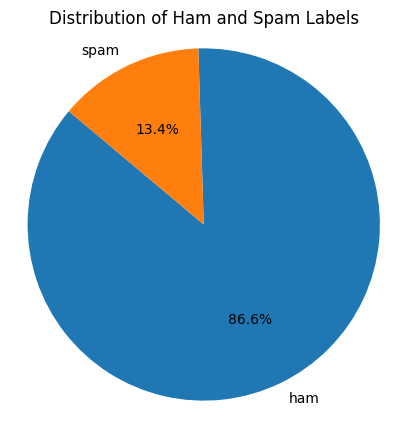

In [499]:
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie([percentage_ham, percentage_spam], labels=["ham", "spam"], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Ham and Spam Labels")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



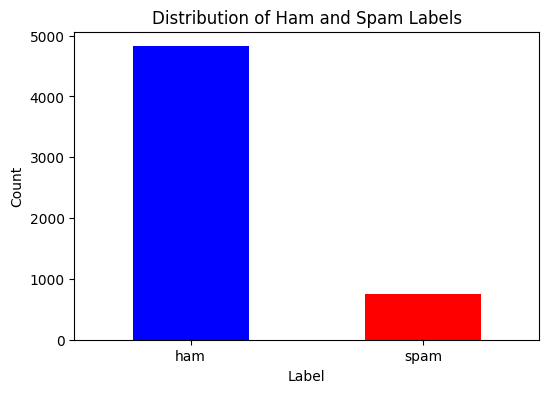

In [500]:
# Create a bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar", color=["blue", "red"])
plt.title("Distribution of Ham and Spam Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)  # To display the labels horizontally
plt.show()

In [501]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'label' column
# Create a new column 'target' based on the 'label' values
df['target'] = df['label'].map({'ham': 0, 'spam': 1})

# Alternatively, you can using a lambda function:
#df['target'] = df['label'].apply(lambda x: 0 if x == 'ham' else 1)

# Print the updated DataFrame to verify the 'target' column
df


,label,text,target
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1
2,ham,"Nah I don't think he goes to usf, he lives around here though",0
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,0
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0
...,...,...,...
5563,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",1
5564,ham,Will ü b going to esplanade fr home?,0
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",0
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,0


In [502]:
import nltk

In [503]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [504]:
df['no_of_characters']=df['text'].apply(len)

In [505]:
df.head(2)

,label,text,target,no_of_characters
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,0,196
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1,155


In [506]:
df['no_of_words'] = df['text'].apply(lambda x :len( nltk.word_tokenize(x)))

In [507]:
df.head(2)

,label,text,target,no_of_characters,no_of_words
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,0,196,41
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1,155,37


In [508]:
df['no_of_Sentence'] = df['text'].apply(lambda x :len( nltk.sent_tokenize(x)))

In [509]:
df.head(2)

,label,text,target,no_of_characters,no_of_words,no_of_Sentence
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,0,196,41,3
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1,155,37,2


In [510]:
df.describe()

,target,no_of_characters,no_of_words,no_of_Sentence
count,5568.000000,5568.000000,5568.000000,5568.000000
mean,0.133980,80.487428,18.840876,2.005927
std,0.340661,59.950961,13.853133,1.540240
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,62.000000,15.000000,2.000000
75%,0.000000,122.000000,27.000000,3.000000
max,1.000000,910.000000,220.000000,38.000000


In [511]:
# Ham
df[df['target']==0].describe()

,target,no_of_characters,no_of_words,no_of_Sentence
count,4822.0,4822.000000,4822.000000,4822.000000
mean,0.0,71.487764,17.427209,1.846122
std,0.0,58.451963,14.121909,1.475783
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,93.000000,23.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [512]:
# Spam
df[df['target']==1].describe()

,target,no_of_characters,no_of_words,no_of_Sentence
count,746.0,746.000000,746.000000,746.000000
mean,1.0,138.659517,27.978552,3.038874
std,0.0,28.891361,6.853173,1.549138
min,1.0,13.000000,2.000000,1.000000
25%,1.0,133.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


In [513]:
df[df['target']==0]['no_of_characters']

0       196
2        61
3        77
4        35
5       160
       ... 
5561     12
5564     36
5565     57
5566    125
5567     26
Name: no_of_characters, Length: 4822, dtype: int64

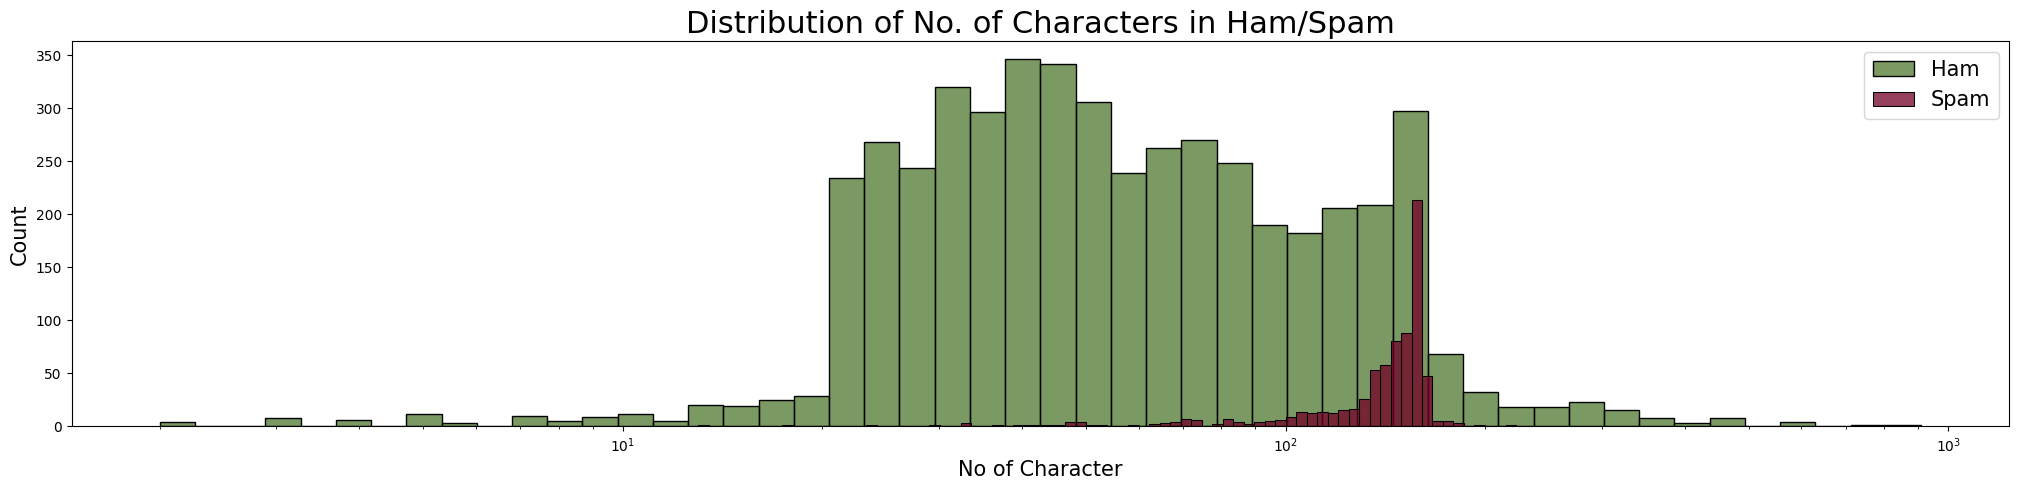

In [514]:
plt.figure(figsize=(25,5))
sns.histplot(df[df['target']==0]['no_of_characters'],color='#4f772d',log_scale=True)
sns.histplot(df[df['target']==1]['no_of_characters'],color='#720026',log_scale=True)
plt.title("Distribution of No. of Characters in Ham/Spam",fontsize=22)
plt.xlabel('No of Character',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Ham','Spam'],fontsize=15);

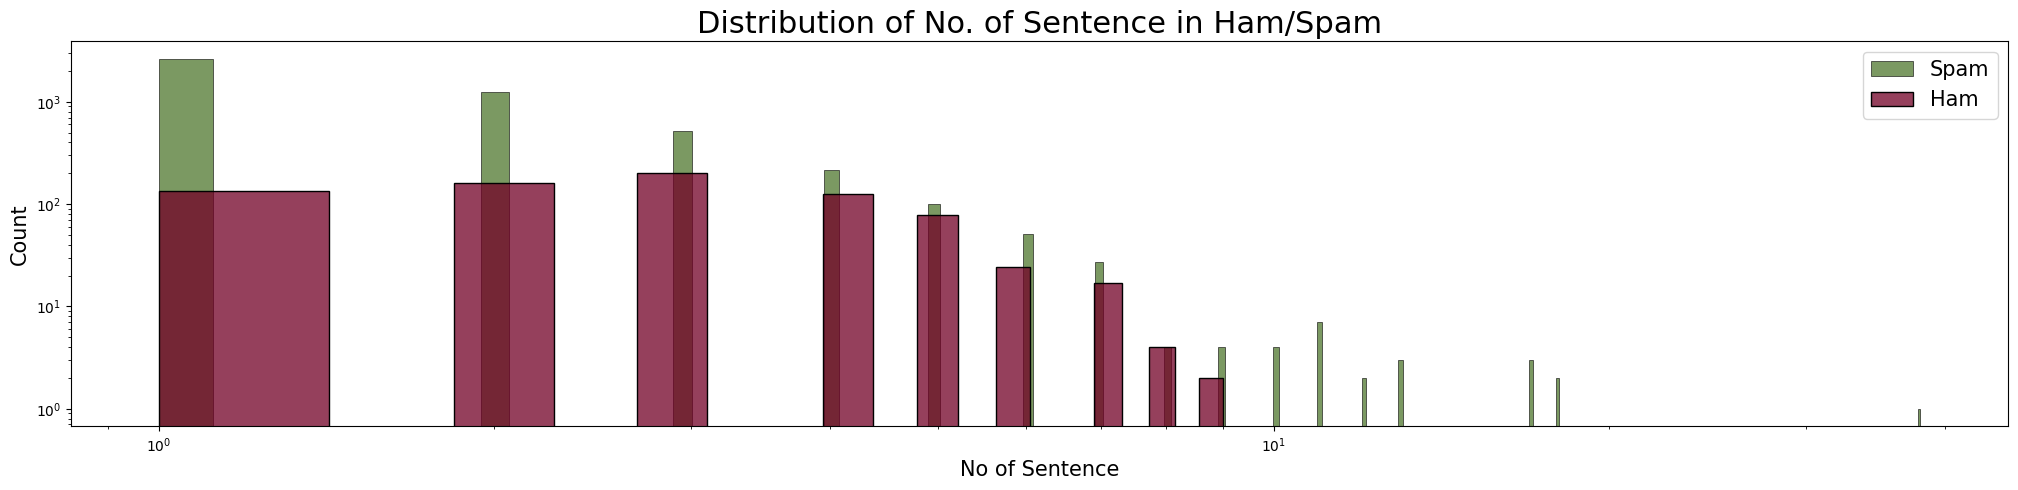

In [515]:
plt.figure(figsize=(25,5))
sns.histplot(df[df['label']=='ham']['no_of_Sentence'],color='#4f772d')
sns.histplot(df[df['label']=='spam']['no_of_Sentence'],color='#720026')

plt.title("Distribution of No. of Sentence in Ham/Spam",fontsize=22)
plt.xlabel('No of Sentence',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Spam','Ham'],fontsize=15)
plt.loglog(True)
plt.yscale('log');

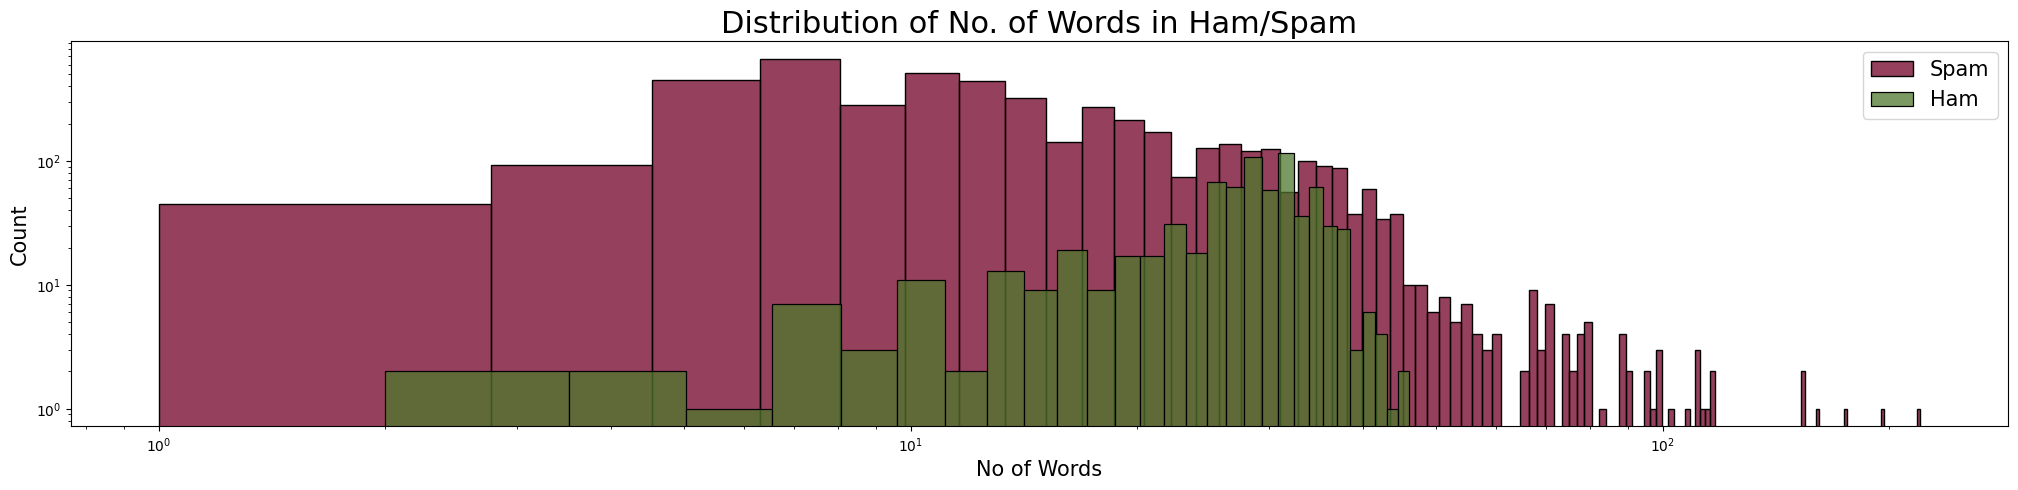

In [516]:
plt.figure(figsize=(25,5))
sns.histplot(df[df['label']=='ham']['no_of_words'],color='#720026')
sns.histplot(df[df['label']=='spam']['no_of_words'],color='#4f772d')


plt.title("Distribution of No. of Words in Ham/Spam",fontsize=22)
plt.xlabel('No of Words',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(['Spam','Ham'],fontsize=15)
plt.loglog(True)
plt.yscale('log');

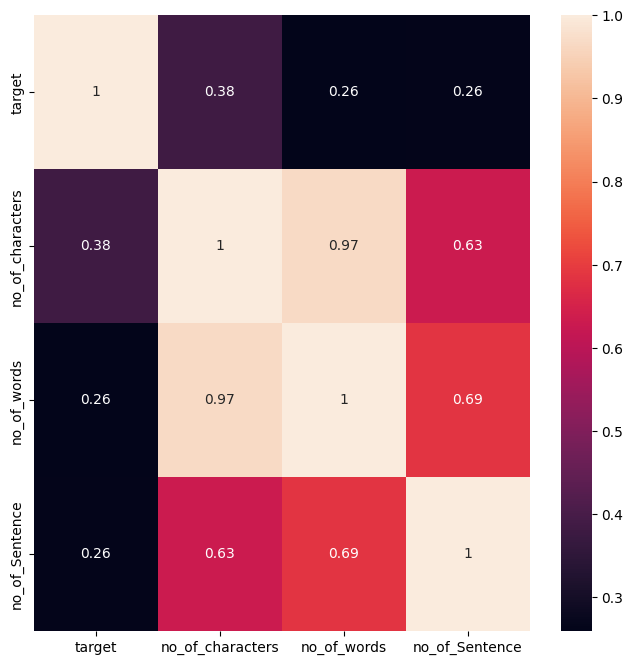

In [517]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

#### 3. Data Preprocessing
        Lower case
        Tokenization
        Removing special characters
        Removing stop words and punctuation
        Stemming

In [518]:
from  nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [519]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re  # Import the regular expression library

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def transform_text(text):
    # 1. Lower case
    text = text.lower()

    # 2. Tokenization
    text = nltk.word_tokenize(text)

    # 3. Removing special characters and digits
    text = [word for word in text if word.isalnum() and not re.match(r'^\d+$', word)]  # Exclude pure digits

    # 4. Removing stop words
    text = [word for word in text if word not in stopwords.words('english')]

    # 5. Lemmatization
    text = [lemmatizer.lemmatize(word) for word in text]

    # 6. Join the words back into a string
    return " ".join(text)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [520]:
transform_text("Hi how Are You breaking dancing girl @ 200 '! #$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' ")

'hi breaking dancing girl'

In [521]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [522]:
df['text'][9:10]

9    SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
Name: text, dtype: object

In [523]:
transform_text(str(df['text'][9:10]))

'six chance win cash pound txt csh11 send cost 6days tsandcs apply reply hl info name text dtype object'

In [524]:
### Transform text with Function

### Transform text with Function

In [525]:
df['transform_text'] = df['text'].apply(transform_text)

In [526]:
df.tail(2)

,label,text,target,no_of_characters,no_of_words,no_of_Sentence,transform_text
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,0,125,27,1,guy bitching acted like interested buying something else next week gave u free
5567,ham,Rofl. Its true to its name,0,26,7,2,rofl true name


In [527]:
from wordcloud import WordCloud
wc =WordCloud(width=600 ,height=500,min_font_size=10,background_color='white')

In [528]:
Ham_wc =wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=' '));

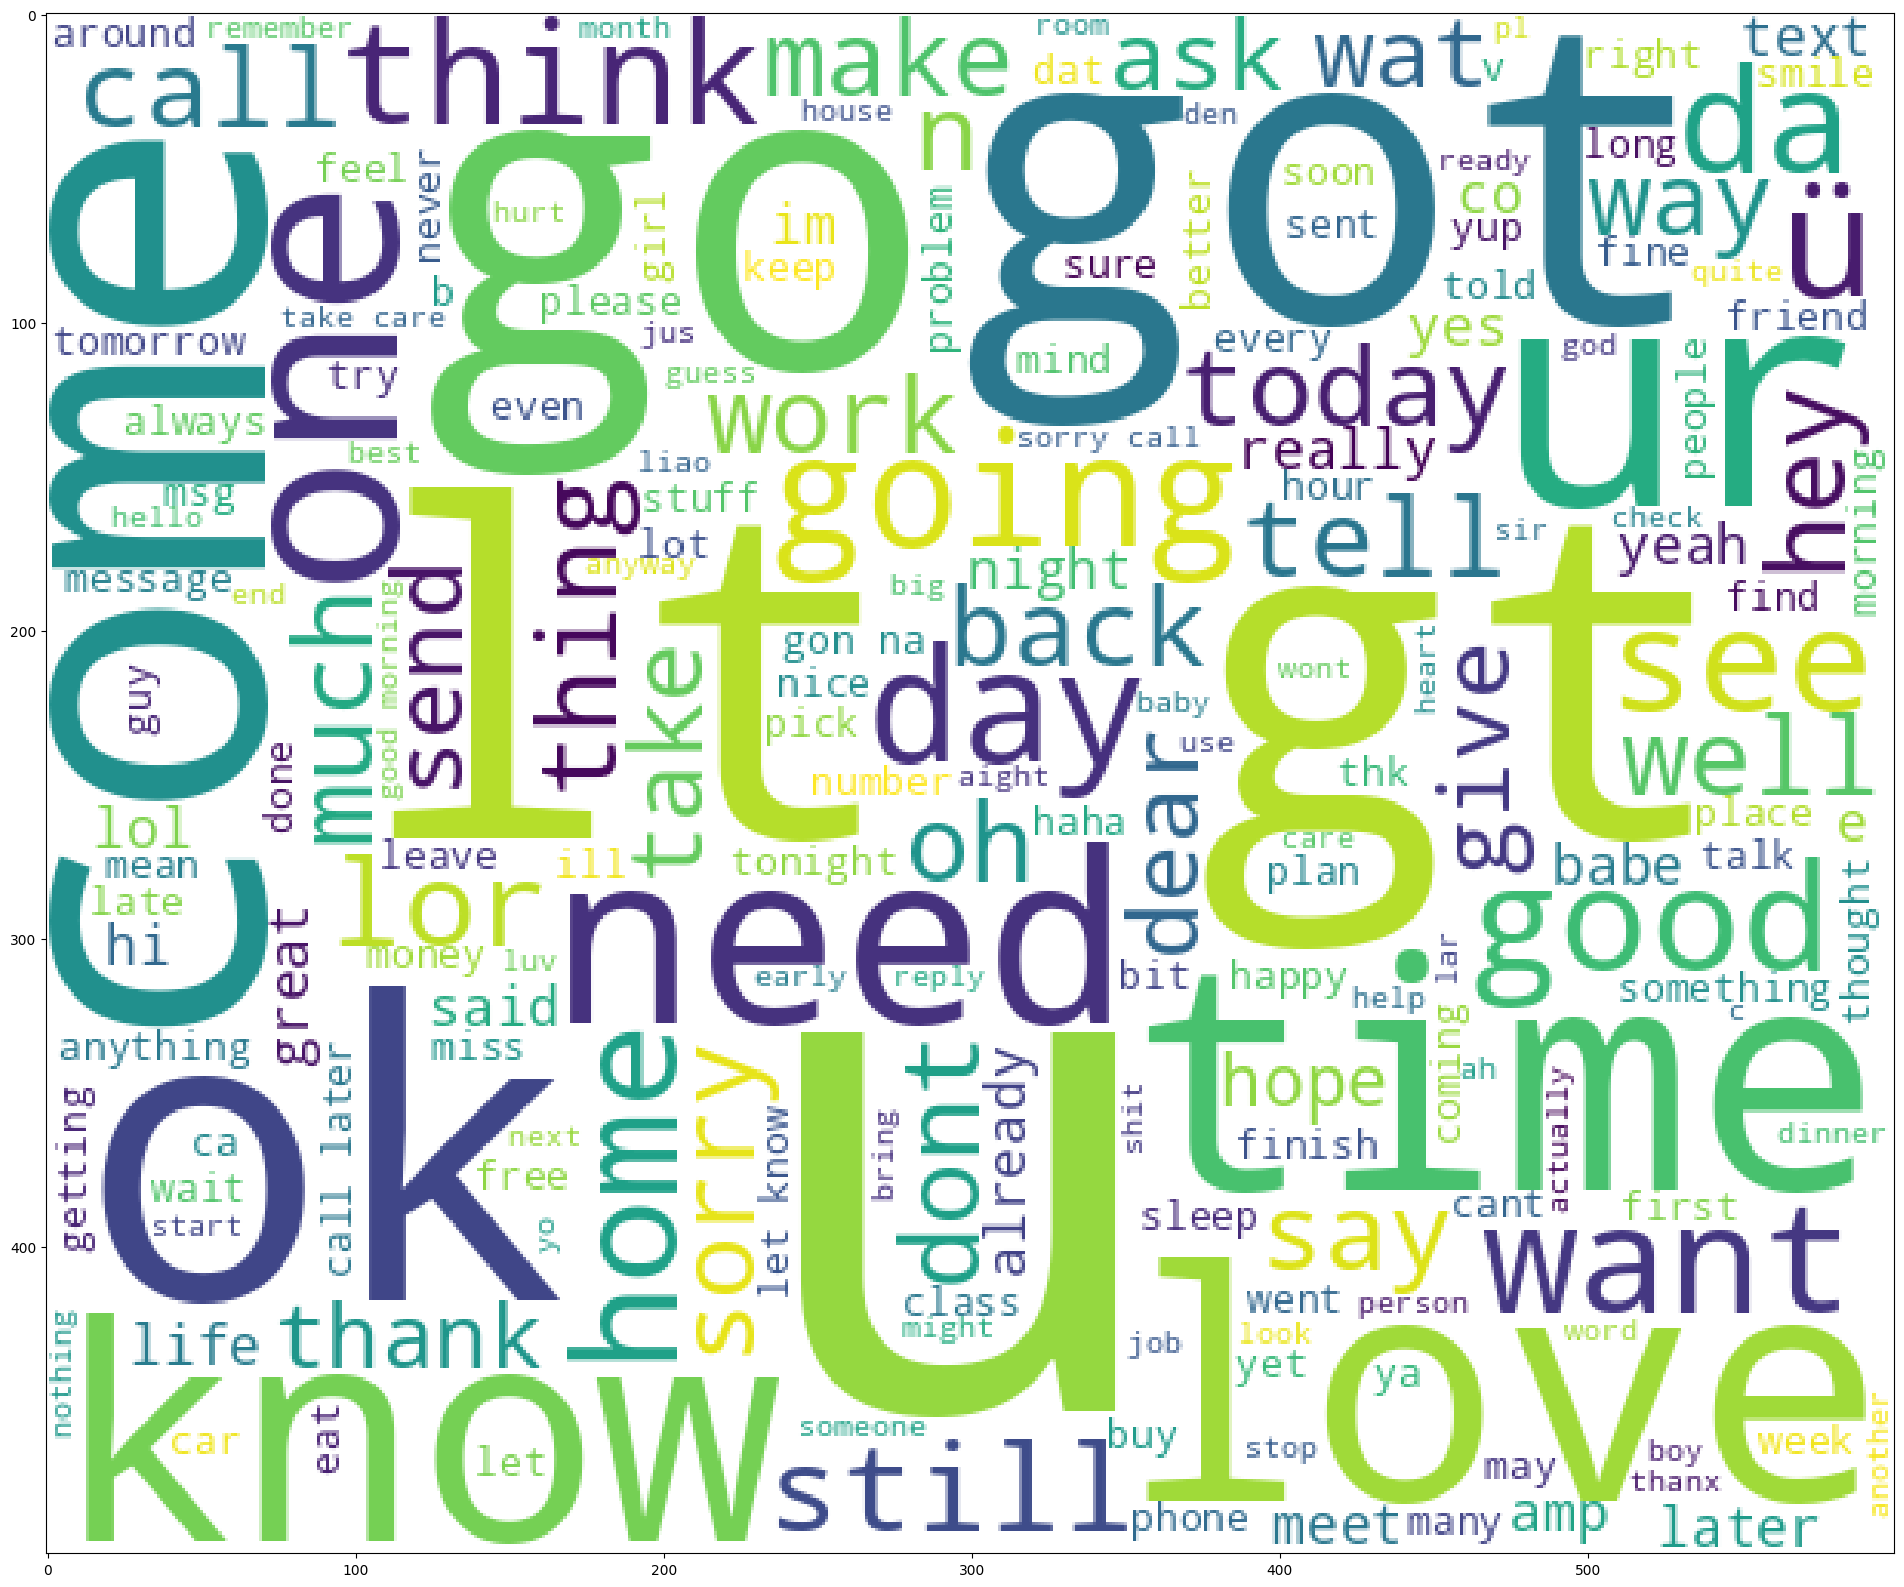

In [529]:
plt.figure(figsize=(50,20))
plt.imshow(Ham_wc);

In [530]:
Spam_wc =wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=' '));

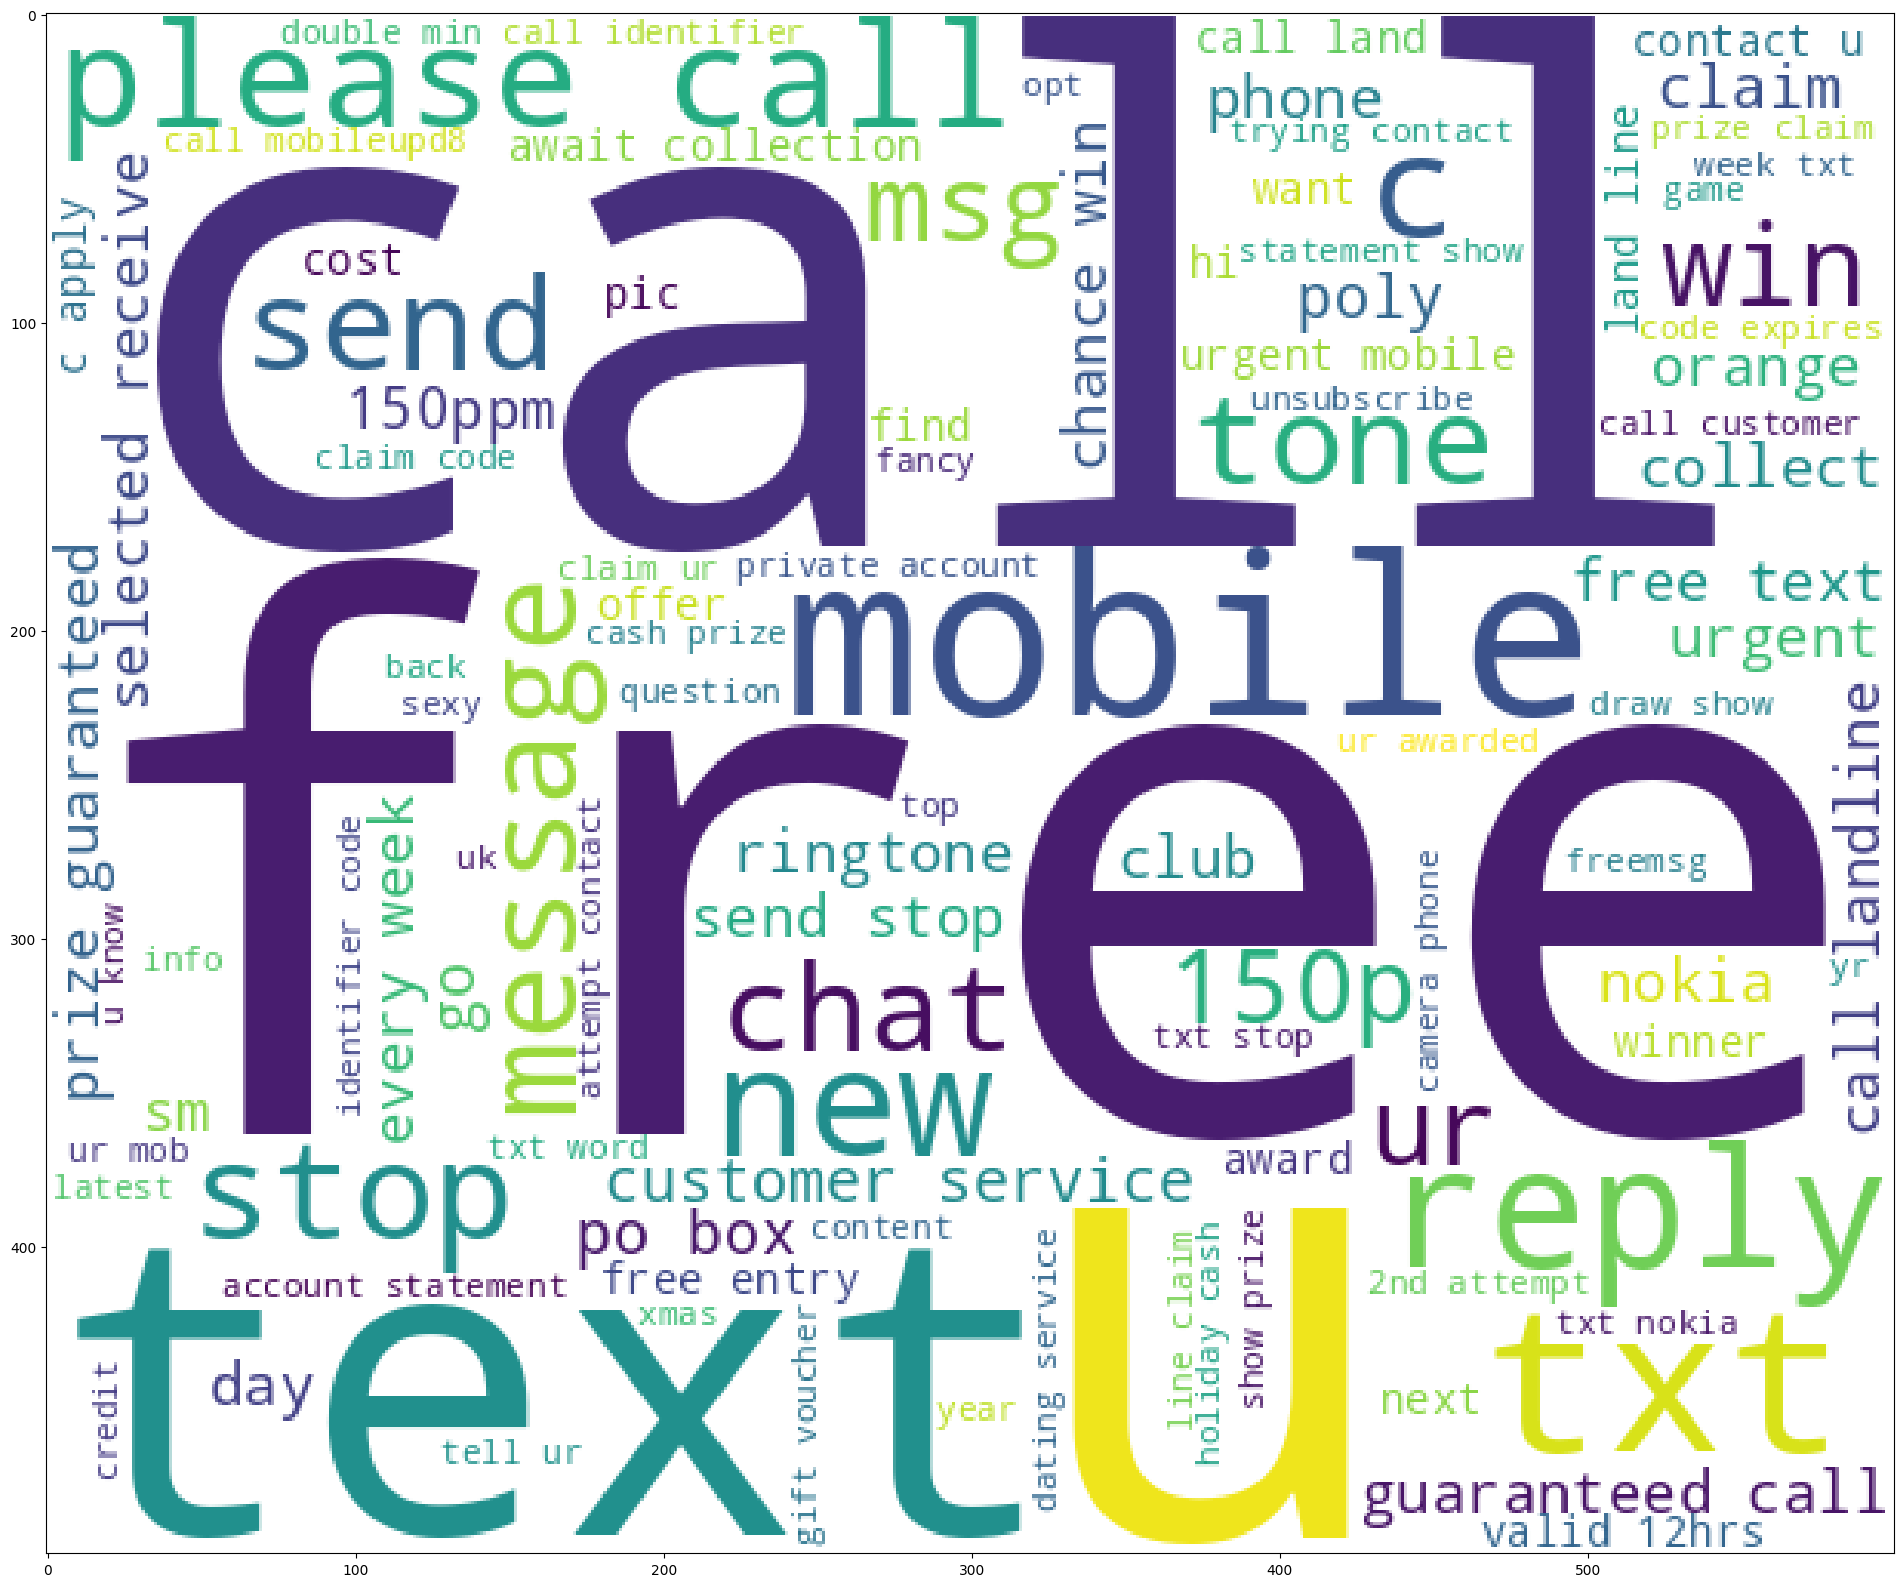

In [531]:
plt.figure(figsize=(50,20))
plt.imshow(Spam_wc);

In [532]:
ham_word = []
for text in df[df['label']=='ham']['transform_text'].tolist():
    for word in text.split():
        ham_word.append(word)

In [533]:
len(ham_word)

38051

In [534]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [535]:
ham_data = pd.DataFrame(Counter(ham_word).most_common(30),columns=['word','count'])
ham_data.head()

,word,count
0,u,1047
1,gt,318
2,lt,316
3,get,313
4,go,277


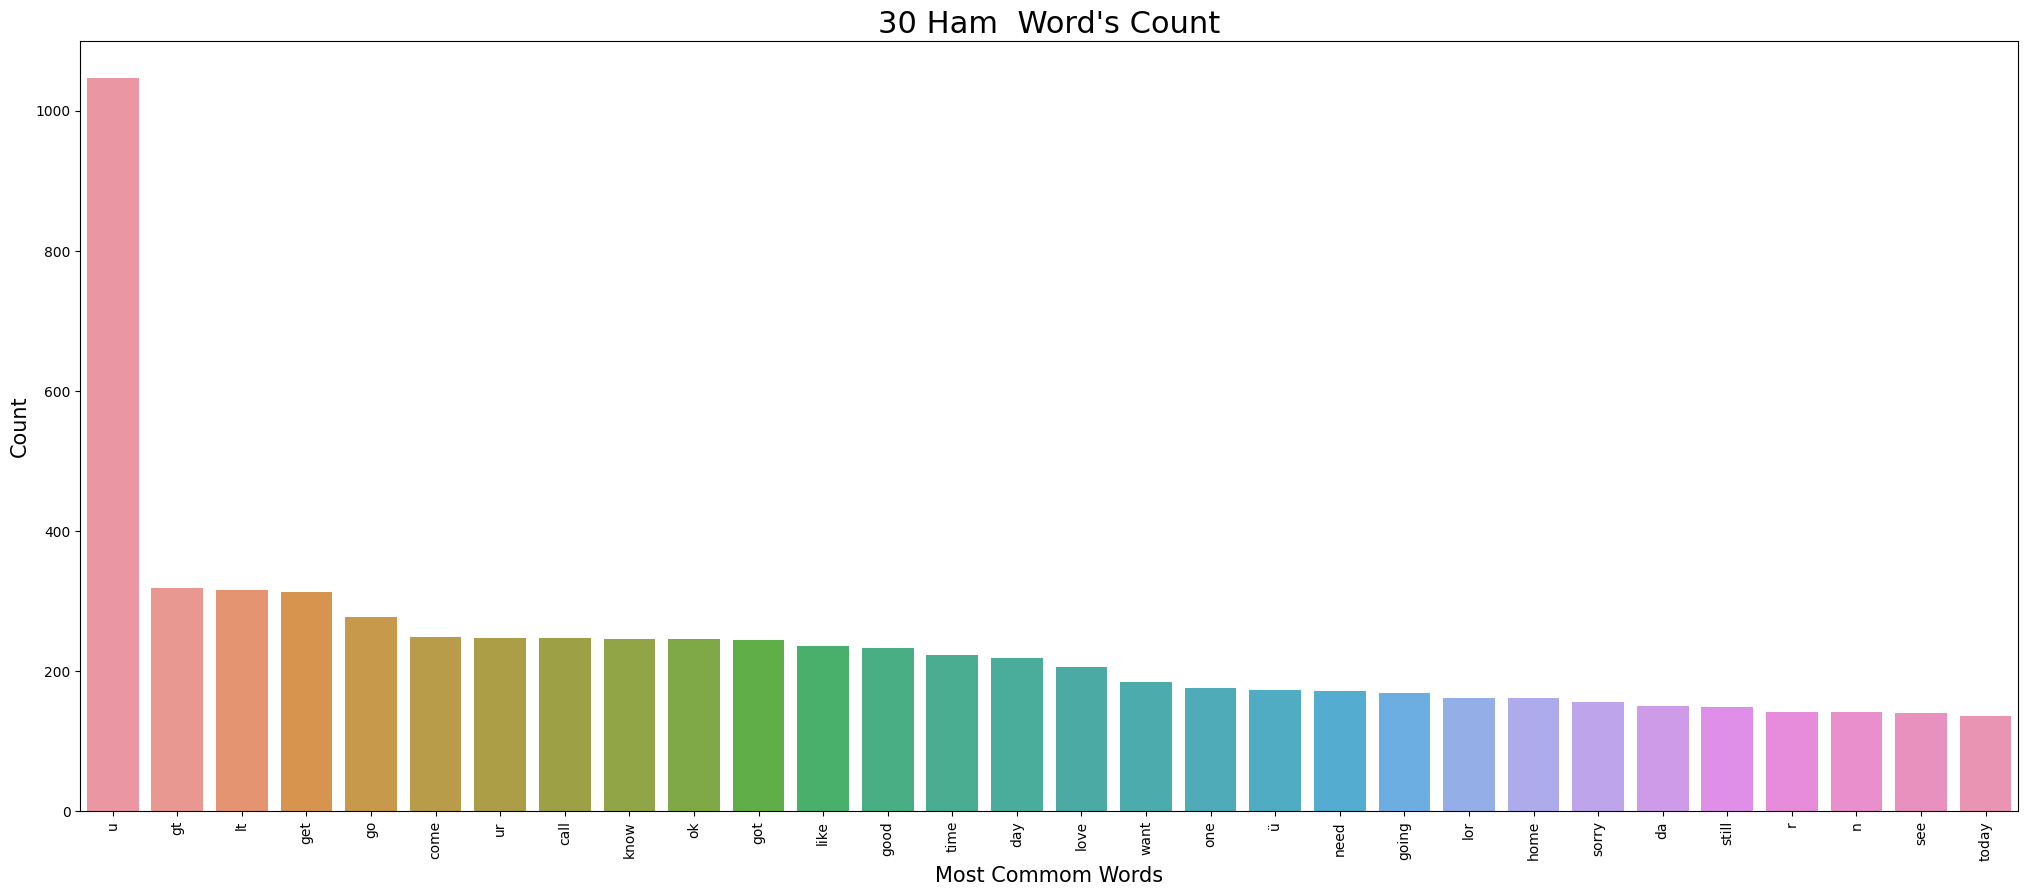

In [536]:
plt.figure(figsize=(25,10))
sns.barplot(x='word',y='count',data=ham_data)
plt.xticks(rotation='vertical')
plt.title("30 Ham  Word's Count",fontsize=22)
plt.xlabel('Most Commom Words',fontsize=15)
plt.ylabel('Count',fontsize=15);

In [537]:
spam_word = []
for text in df[df['label']=='spam']['transform_text'].tolist():
    for word in text.split():
        spam_word.append(word)

In [538]:
len(spam_word)

10182

In [539]:
spam_data = pd.DataFrame(Counter(spam_word).most_common(30),columns=['word','count'])
spam_data.head()

,word,count
0,call,358
1,free,219
2,txt,156
3,u,150
4,ur,144


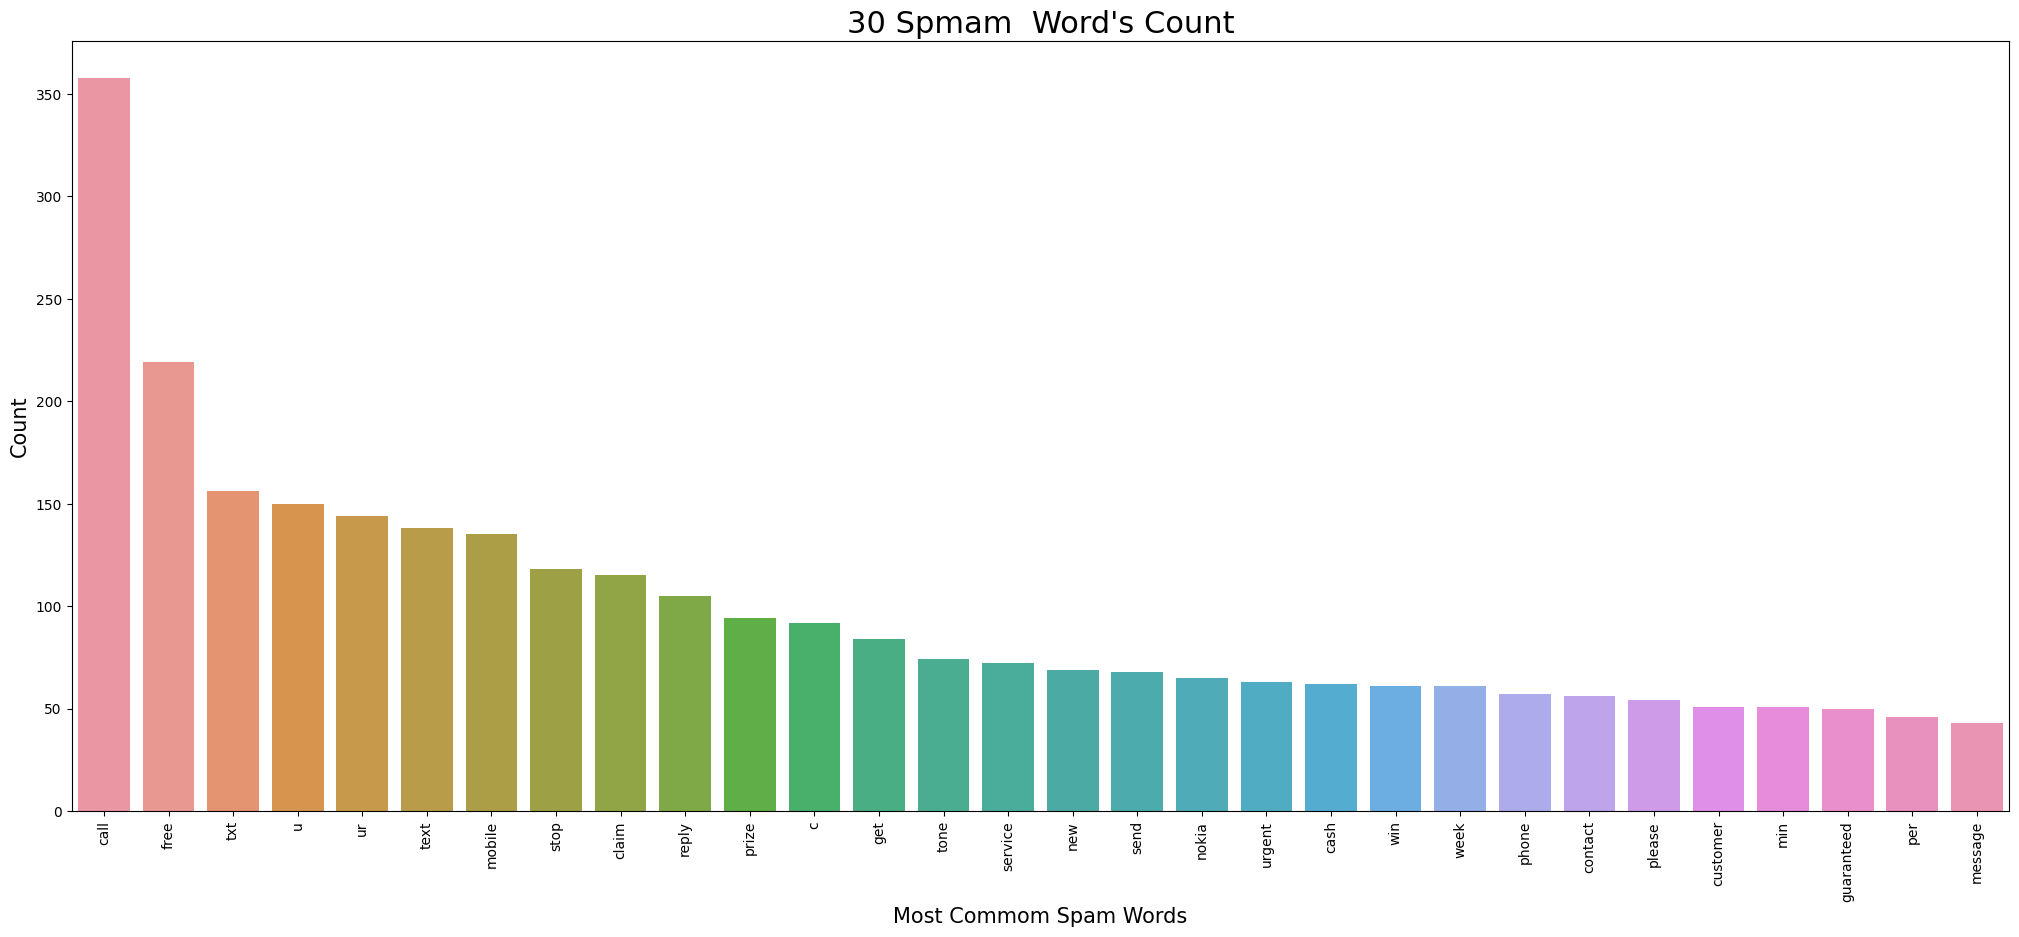

In [540]:
plt.figure(figsize=(25,10))
sns.barplot(x='word',y='count',data=spam_data)
plt.xticks(rotation='vertical')
plt.title("30 Spmam  Word's Count",fontsize=22)
plt.xlabel('Most Commom Spam Words',fontsize=15)
plt.ylabel('Count',fontsize=15);

In [541]:
df.head(2)

,label,text,target,no_of_characters,no_of_words,no_of_Sentence,transform_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,0,196,41,3,searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,1,155,37,2,free entry wkly comp win fa cup final tkts 21st may text fa receive entry question std txt rate c apply 08452810075over18


# 4. Model Building

In [542]:
# Divide Independent Feature (X) --Vector_text ,dependent Feature (y) --target
X =df['transform_text']
y = df['target']

In [543]:
# split train ,test X and y
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Using Count Vectorizer

In [544]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create a CountVectorizer to convert text data into numerical features with specific parameters
vectorizer = CountVectorizer(
    stop_words='english',  # Remove common English stop words
    lowercase=True,        # Convert text to lowercase
    max_df=0.85,           # Ignore terms that appear in more than 85% of documents
    min_df=5,              # Ignore terms that appear in less than 2 documents
    max_features=1000     # Include all terms in the vocabulary
)
X_train_count = vectorizer.fit_transform(X_train.values).toarray()
X_test_count = vectorizer.transform(X_test.values).toarray()


import joblib

# Save the CountVectorizer to a file
with open("count_vectorizer.pkl", "wb") as vectorizer_file:
    joblib.dump(vectorizer, vectorizer_file)


In [545]:
# Set the print options to display the full array
#np.set_printoptions(threshold=np.inf)
X_train_count.shape

(4454, 1000)

In [546]:
X_test_count.shape

(1114, 1000)

In [547]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Logistic Regression with penalty": LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.1),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)  # Change 'n_neighbors' as needed
}

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score", "Train Score", "Test Score"])

# Iterate through the classifiers and evaluate them
for name, classifier in classifiers.items():
    print(f"Evaluating {name}:")

    # Train the classifier
    classifier.fit(X_train_count, y_train)

    # Make predictions on the test data
    y_pred = classifier.predict(X_test_count)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    # Calculate train score
    train_score = classifier.score(X_train_count, y_train)

    # Calculate test score
    test_score = classifier.score(X_test_count, y_test)

    # Generate a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

    # Append metrics to the DataFrame
    metrics_df = metrics_df.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Train Score": train_score,
        "Test Score": test_score
    }, ignore_index=True)

    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(report)
    print("\n")

# Display the metrics DataFrame
print("Metrics for Each Classifier using Count Vectorizer:")
metrics_df

Evaluating Logistic Regression:
Confusion Matrix:
[[964   1]
 [ 28 121]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.81      0.89       149

    accuracy                           0.97      1114
   macro avg       0.98      0.91      0.94      1114
weighted avg       0.97      0.97      0.97      1114



Evaluating Logistic Regression with penalty:
Confusion Matrix:
[[931  34]
 [ 24 125]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97       965
        spam       0.79      0.84      0.81       149

    accuracy                           0.95      1114
   macro avg       0.88      0.90      0.89      1114
weighted avg       0.95      0.95      0.95      1114



Evaluating Multinomial Naive Bayes:
Confusion Matrix:
[[950  15]
 [ 15 134]]
Classification Report:
              precision    recall  f1

,Classifier,Accuracy,Precision,Recall,F1-Score,Train Score,Test Score
0,Logistic Regression,0.973968,0.991803,0.812081,0.892989,0.986753,0.973968
1,Logistic Regression with penalty,0.947935,0.786164,0.838926,0.811688,0.952627,0.947935
2,Multinomial Naive Bayes,0.973070,0.899329,0.899329,0.899329,0.979120,0.973070
3,Decision Tree,0.962298,0.859060,0.859060,0.859060,0.999102,0.962298
4,Random Forest,0.972172,0.933824,0.852349,0.891228,0.999102,0.972172
5,XGBoost,0.965889,0.966387,0.771812,0.858209,0.983386,0.965889
6,K-Nearest Neighbors,0.947935,0.978947,0.624161,0.762295,0.971935,0.947935


In [548]:
import numpy as np
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define a range of hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

# Initialize the MultinomialNB classifier
nb_classifier = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train_count, y_train)

# Get the best hyperparameters found by the grid search
best_params = grid_search.best_params_
print(best_params)

# Create a new MultinomialNB classifier with the best hyperparameters
best_nb_classifier = MultinomialNB(**best_params)

# Train the best classifier on the entire training dataset
best_nb_classifier.fit(X_train_count, y_train)

# Make predictions on the test data
y_pred = best_nb_classifier.predict(X_test_count)

# Save the trained classifier to a file using pickle
with open("best_nb_classifier.pkl", "wb") as file:
    pickle.dump(best_nb_classifier, file)


{'alpha': 2.0, 'fit_prior': True}


In [549]:
# Calculate train score
train_score = best_nb_classifier.score(X_train_count, y_train)

# Calculate test score
test_score = best_nb_classifier.score(X_test_count, y_test)

In [550]:
train_score

0.9788953749438707

In [551]:
test_score

0.9730700179533214

In [552]:
# Calculate precision
precision = precision_score(y_test, y_pred)
precision


0.8993288590604027

In [553]:
# Calculate recall
recall = recall_score(y_test, y_pred)
recall


0.8993288590604027

In [554]:
 # Calculate F1-score
f1 = f1_score(y_test, y_pred)
f1

0.8993288590604027

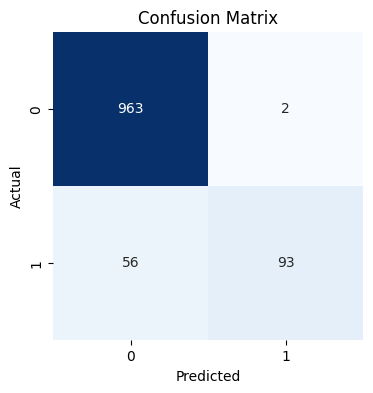

In [555]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [556]:
import numpy as np
import joblib

# Load the saved CountVectorizer
with open("/content/count_vectorizer.pkl", "rb") as vectorizer_file:
    loaded_vectorizer = joblib.load(vectorizer_file)

# Transform the input email text using the loaded vectorizer
email_text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005."]
email_count = loaded_vectorizer.transform(email_text)

# Load the saved XGBoost classifier
with open("//content/best_nb_classifier.pkl", "rb") as nb_file:
    loaded_nb_classifier = joblib.load(nb_file)

# Make predictions on the input email text
predictions = loaded_nb_classifier.predict(email_count)

# Print the predictions
if predictions[0] == 0:
    print('Not Spam')
else:
    print('Spam')


Spam
